# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 DX 컨설턴트로써 데이터분석을 맡았습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!
----
* 반복되는 코드는 함수로 만듭시다!
    * 함수를 만드는 순서
        * 먼저 절차대로 코드를 작성해서 실행한다.
        * 실행된 코드(오류가 없는 코드)를 가져다 함수로 구성한다.
            * 입력과 출력 결정

# 2.환경준비

## (1) 라이브러리 불러오기

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

| 변수명 | 설명 | 구분 |
| ---- | ---- | ---- |
| Sales  |  각 지역 판매량(단위 : 1000개) | Target |
| CompPrice  |  경쟁사 가격(단위 : 달러) | feature |
| Income  |  지역 평균 소득(단위 : 1000달러) | feature |
| Advertising  |  각 지역, 회사의 광고 예산(단위 : 1000달러) | feature |
| Population  |  지역 인구수(단위 : 1000명) | feature |
| Price  |  자사 지역별 판매가격 | feature |
| ShelveLoc  |  진열상태 | feature |
| Age  |  지역 인구의 평균 연령 | feature |
| Urban  |  도심 지역 여부(Yes,No) | feature |
| US  |  매장이 미국에 있는지 여부(Yes,No) | feature |

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [4]:
# 숫자형 변수 단변량 분석 함수

def eda_1_n(var, data) :
    
    #기초통게량
    display(data[[var]].describe().T)
    
    #시각화
    plt.figure(figsize = (12, 8))  # 그래프 크기 조절
    plt.subplot(2, 1, 1)  # 2행 1열로 1번째 그래프
    sns.histplot(x = var, data = data, kde = True)

    plt.subplot(2, 1, 2) # 2행 1열로 2번째 그래프
    sns.boxplot(x = var , data = data)
    plt.grid()  # 격자 추가
   
    plt.show()  # 그래프 print

In [6]:
# 숫자형 변수에 대한 단변량 분석 함수 
def eda_1_m(data, var, bins = 30) : 
    # 기초 통계량 
    display(data[[var]].describe().T) 
    # 시각화 
    plt.figure(figsize = (12,8)) 
    plt.subplot(2,1,1) 
    sns.histplot(data[var], bins = bins, kde = True) 
    plt.grid() 
    
    plt.subplot(2,1,2) 
    sns.boxplot(x = data[var]) 
    plt.grid() 
plt.show()

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


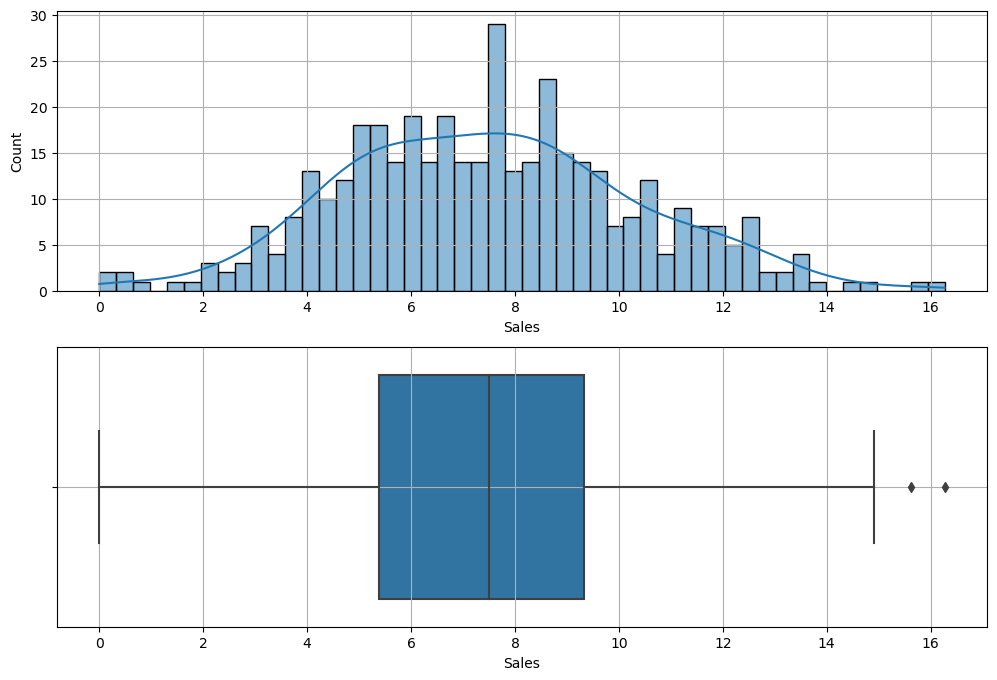

In [9]:
eda_1_m(data, 'Sales', bins = 50)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 각 지역 판매량(단위 : 1000개)

* 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
* 너무 국내 시장에 집중됨.
* 지역마다의 구매력을 제대로 파악하지 못하고 있음.

1. 각 지역의 판매량의 분포 자체가 정규 분포로 이루어져 있다.
2. 평균 매출의 상승을 위해서는 평균(7.49)보다 작은 판매량의 분석이 필요하다고 판단
3. 또한 0 ~ 2까지의 값이 나타나는 것이 전체적인 판매량에 하락의 원인일 가능성이 있다고 생각하여 파악봐야 한다 - 지역마다 구매력을 제대로 파악하지 못하고 있다는 것을 판단
4. 이상치 값으로 나오는 2개의 값에 대한 제거 유무를 판단해 봐야하는데, 두개의 값을 비교해서 어떤 특징이 있는지 파악

5) 추가 분석해 볼 사항이 있나요?

* 타겟의 범위를 평균 이상과 이하로 나누어 어떤 차이가 있는지를 파악
* 0 ~ 2 까지의 타겟에 대한 분석도 필요하다고 생각
* 이상치 처리를 위한 이상치 행 확인

> 강사님의 분석

* 판매량이 적고 많은 매장에 대한 구매층 / 소득층 / 도심 / 국내 국외에 대한 분석

## (2) CompPrice

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


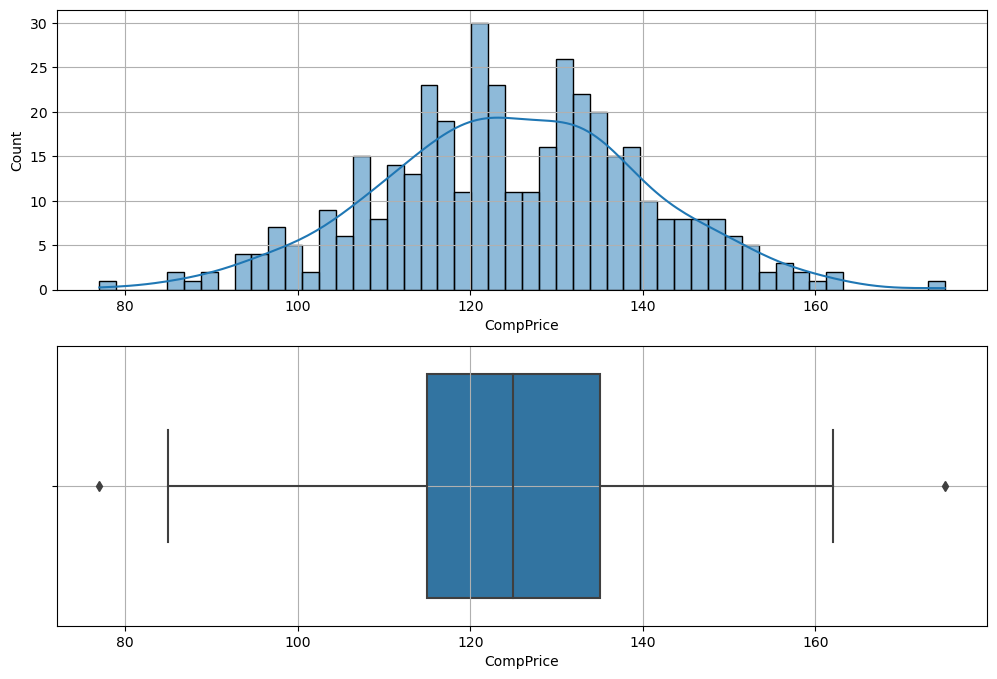

In [12]:
eda_1_m(data, 'CompPrice', bins = 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

경쟁사 가격(단위 : 달러)

* 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
* 너무 국내 시장에 집중됨.
* 지역마다의 구매력을 제대로 파악하지 못하고 있음.

1. 박스 플롯에 이상치가 한개씩 존재하는데 이것을 제외하고 생각해도 괜찮다고 판단 - 정규 분포
2. 평균을 기준으로 대칭하는 그래프, 가격 경쟁력이 하락하고 있다라는 뜻이 만약 평균 이하의 값들이 많아 진 것이라면 유의미한 인사이트 일 수 있다고 생각
3. 하지만 대칭하는 그래프 자체가 경쟁사들의 가격측정을 평균을 기준으로 높게 책정하는 기업과 낮게 책정하는 기업이 확인된다.

5) 추가 분석해 볼 사항이 있나요?

* 평균을 기준으로 두개의 그룹으로 나누어서 어떤 차이가 있는지 분석

> 강사님 분석

* 경쟁사와 비교해서 높은 가격과 낮은 가격에 대한 판단

## (3) Income

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


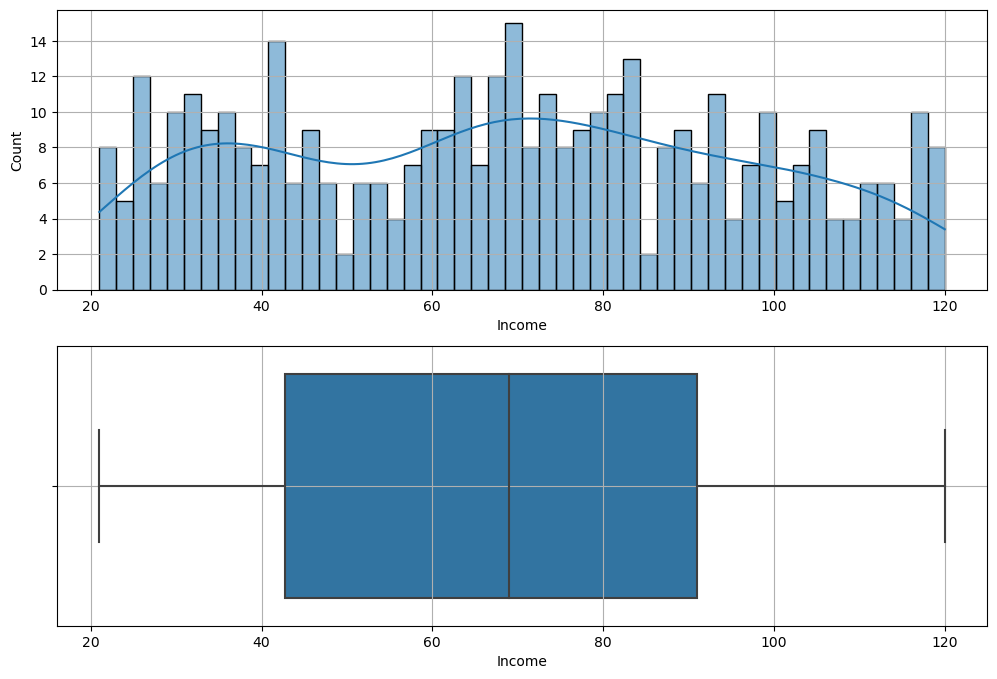

In [13]:
eda_1_m(data, 'Income', bins = 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

지역 평균 소득(단위 : 1000달러)

* 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
* 너무 국내 시장에 집중됨.
* 지역마다의 구매력을 제대로 파악하지 못하고 있음

1. 지역마다 구매력을 파악하지 못한다는 느낌을 받을 수 있는 그래프 형식
2. 20 ~ 40의 그래프가 많은 것이 보이며, 이 지역에서 얼마나 구매를 했는지를 파악해보는 것도 좋은 방안
3. 박스 플롯 자체의 상자가 크다는 것은 40 ~ 90 사이의 사람들이 50프로라는 말이기 떄문에 이 범위의 사람들이 평균이라고 볼 수 있다.

5) 추가 분석해 볼 사항이 있나요?

* 20 ~ 40 비율의 사람들의 구매력 파악
* 50% 해당하는 사람들의 구매력과 패턴 파악

## (4) Advertising

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


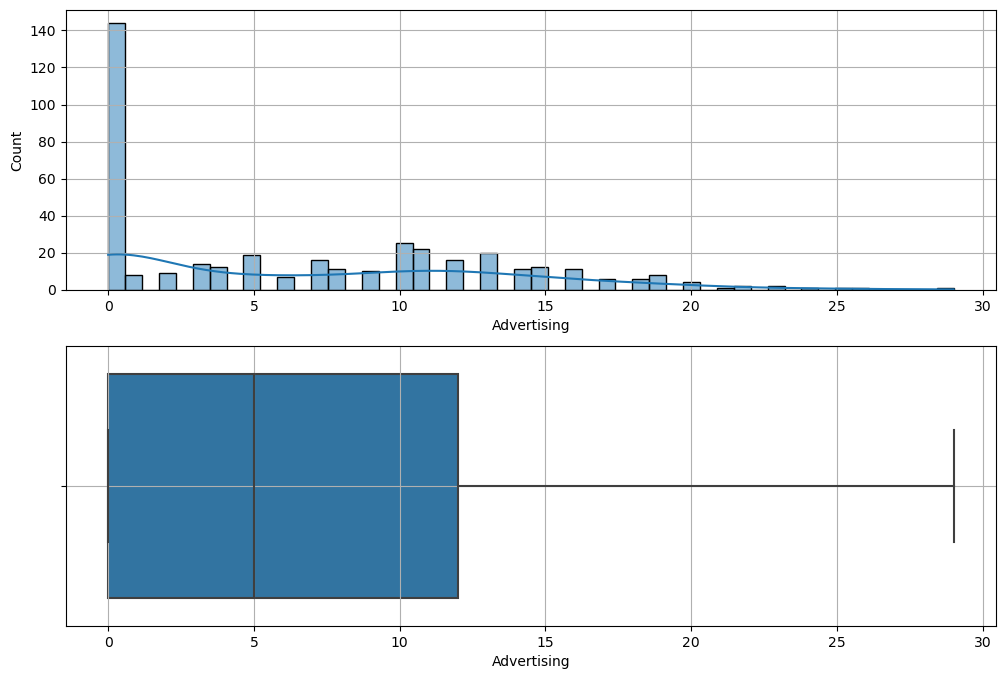

In [14]:
eda_1_m(data, 'Advertising', bins = 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

각 지역, 회사의 광고 예산(단위 : 1000달러)

* 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
* 너무 국내 시장에 집중됨.
* 지역마다의 구매력을 제대로 파악하지 못하고 있음

1. 광고 비용이 0에 많은 비율이 있으며, 박스 플롯도 0 ~ 10 사이의 상자가 그려진 것을 봤을 때, 광고 비용이 적절하게 집행되지 않는다와 상충된 의미를 지닐 가능성이 있다.
2. 광고 비용에 따른 판매량의 차이를 확인해볼 필요가 있어 보임

5) 추가 분석해 볼 사항이 있나요?

* 광고 비용과 판매량의 상관관계

> 광고비 = 0 빼고 추출

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


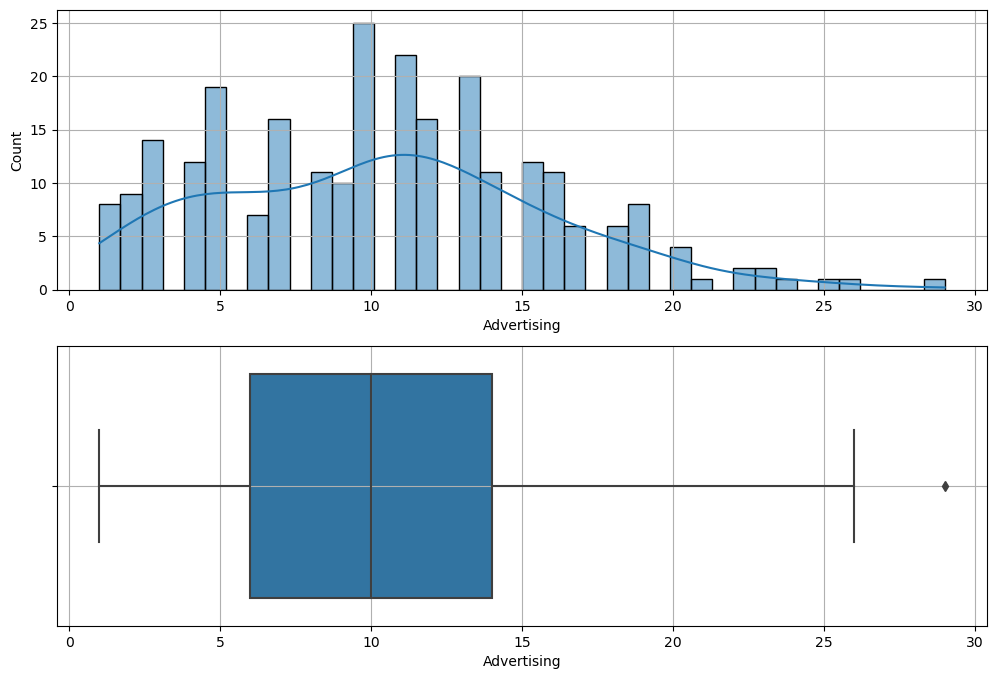

In [23]:
temp  = data.loc[data['Advertising'] > 0]
eda_1_m(temp, 'Advertising', bins = 40)

## (5) Population

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


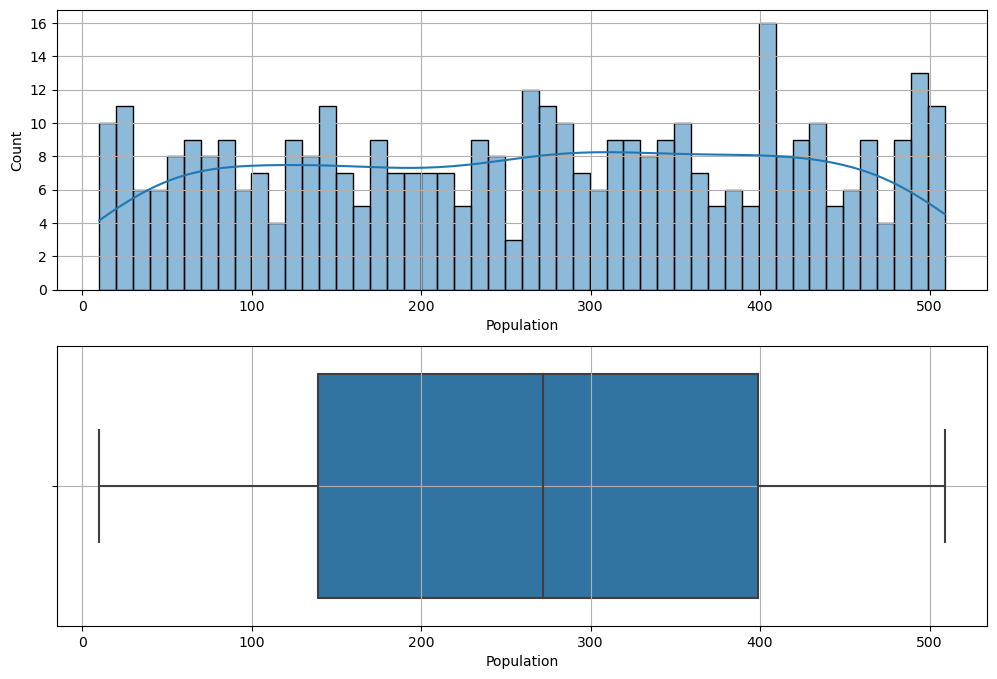

In [15]:
eda_1_m(data, 'Population', bins = 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

지역 인구수(단위 : 1000명)

* 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
* 너무 국내 시장에 집중됨.
* 지역마다의 구매력을 제대로 파악하지 못하고 있음

1. 인구수 자체는 0 ~ 500(단위수 1000명)까지 고르게 분포 되어있는 것을 확인 할 수 있다. - 값이 작아서 나오는 이상치가 아닌 평균적인 인구수 별 판매량을 확인하기 적합하다는 뜻

5) 추가 분석해 볼 사항이 있나요?

* 범위를 나눠서 범주화 이후 판매량과의 비교가 좋은 방안이 될 수 있을 것 같다.

> 강사님 의견

* 규모가 500(단위수 1000명)에 대한 기준이 있어 그 이상은 분점이 날 가능성이 있다.

## (6) Price

1) 변수의 비즈니스 의미

* 자사 상품가격
    * 제품 : 공장에서 제조하는 물건
    * 상품 : 매장에서 판매하는 물건

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


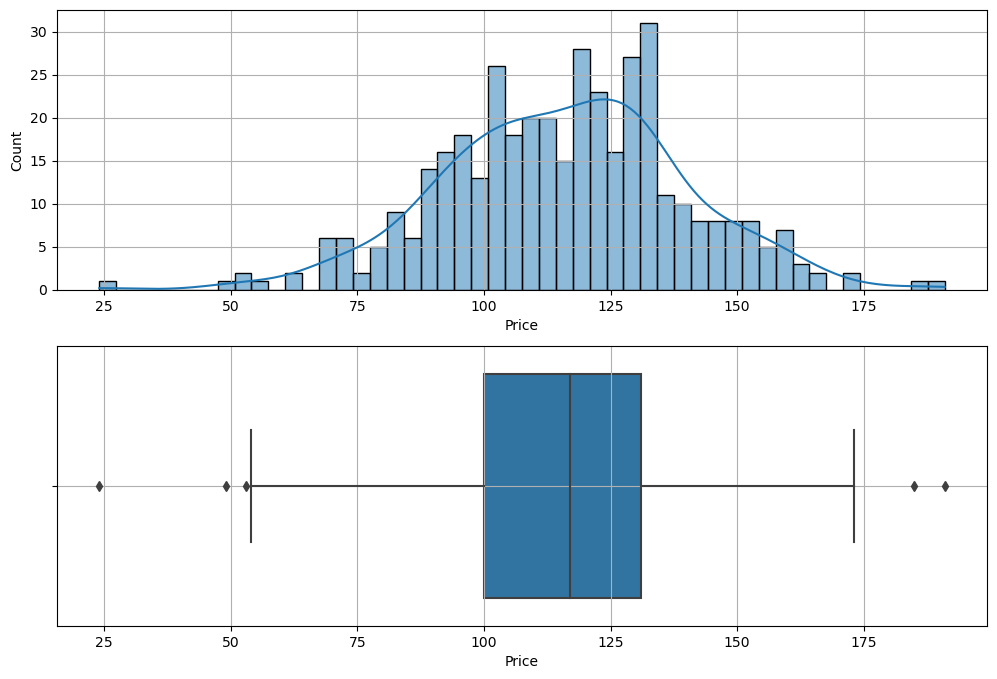

In [16]:
eda_1_m(data, 'Price', bins = 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 자사 지역별 판매가격

* 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
* 너무 국내 시장에 집중됨.
* 지역마다의 구매력을 제대로 파악하지 못하고 있음

1. 정규분포를 띄고 있으며, 평균 115정도에 판매되고 있는 것을 확인 할 수 있다.
2. 가격이 높은 지역과 자격이 낮은 지역의 판매량의 추이를 확인하여 판매량과 가격의 상관관계를 분석해 보는 방향을 생각해 볼 수 있다.
3. 이상치로 보이는 25나 175이상의 가격에서 판매하고 있는 것은 어떤 이유인지를 확인해보고, 그 지역의 특성을 파악해 보는 것도 중요 할 것 같다.

5) 추가 분석해 볼 사항이 있나요?

* 판매량과 가격사이의 상관관계 분석
* 평균에 밀집되어 있지만 평균보다 낮은 지역과 높은 지역의 판매량의 추이도 분석해봐야 할 것 같다.

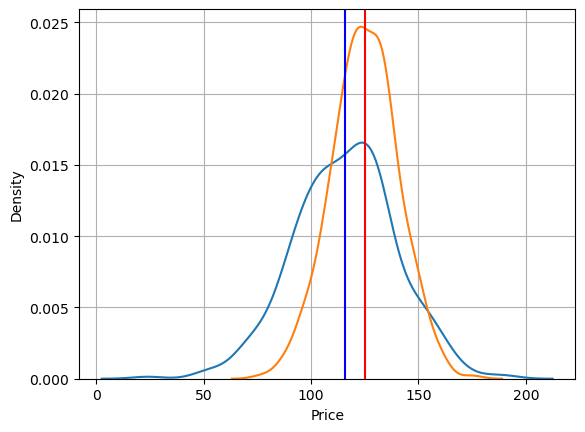

In [20]:
# price - compprice
sns.kdeplot( x = 'Price' , data = data) # 기본색 : 첫번째 -파랑
sns.kdeplot( x = 'CompPrice', data = data) # 기본색 : 두번째 - 주황
plt.axvline(data['Price'].mean(), color = 'b') # 자사 가격 평균
plt.axvline(data['CompPrice'].mean(), color = 'r') # 경쟁사 가격 평균
plt.grid()
plt.show()

## (7) Age

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


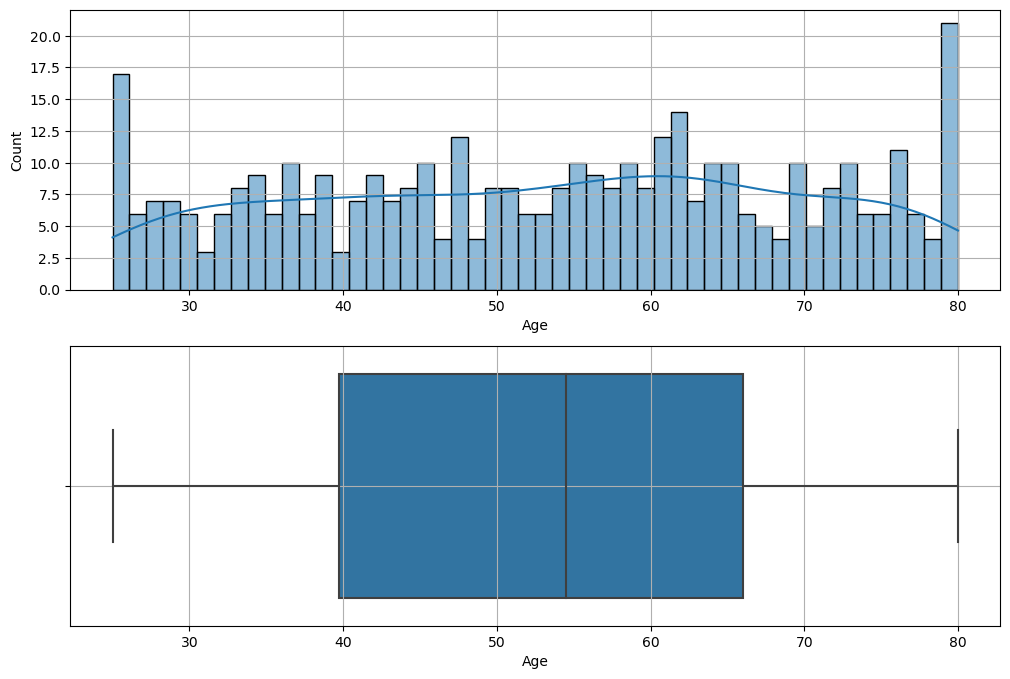

In [17]:
eda_1_m(data, 'Age', bins = 50)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

지역 인구의 평균 연령

* 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
* 너무 국내 시장에 집중됨.
* 지역마다의 구매력을 제대로 파악하지 못하고 있음

1. 20대부터 80대까지 분포되어있으며, 분포가 일정한 것을 보았을 때 연령별 분석도 좋다고 판단
2. 카시트를 구매하는 대상은 아이를 가지고 있는 연령대라고 생각할 때, 30대에서 40대가 주요 고객층일 가능성이 높음
3. 카시트를 애완동물에 사용하는 경우가 있는지 파악, 만약 이게 타겟에 들어간다면 다른 고객들의 목적에 맞는 전략을 설정해야할 경우도 있다.
4. 또한 카시트를 구매하는 경우가 결혼한 부부의 부모님들이 부부에게 선물하는 경우 구매할 때 중요하게 보는 요소에 대한 생각

5) 추가 분석해 볼 사항이 있나요?

* 아이를 가지고 있는 나이에 대한 분석
* 다른 연령층의 카시트 구매 이유에 대한 분석

# 4.단변량분석 : 범주형 변수

In [29]:
# 숫자형 변수 단변량 분석 함수

def eda_1_o(var, data) :
    
    #기초통게량
    display(data[[var]].value_counts() / data.shape[0])
    
    #시각화
    plt.figure(figsize = (10, 10))  # 그래프 크기 조절
    plt.subplot(2, 1, 1)# 2행 1열로 1번째 그래프
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()  # 그래프 print

In [30]:
# 범주형 변수에 대한 단변량 분석 함수 
def eda_1_c(var, data) : 
    # 기초 통계량 
    cnt = data[var].value_counts() # 시리즈 : index / value로 나뉨
    prop = data[var].value_counts()/data.shape[0] 
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values}) # 딕셔너리 형태로 넣어서 df로 변환
    display(temp) 
    # 시각화 
    sns.countplot(x = var, data = data) 
    plt.grid() 
plt.show()

## (1) Urban

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,Class,Count,Prop
0,Yes,282,0.705
1,No,118,0.295


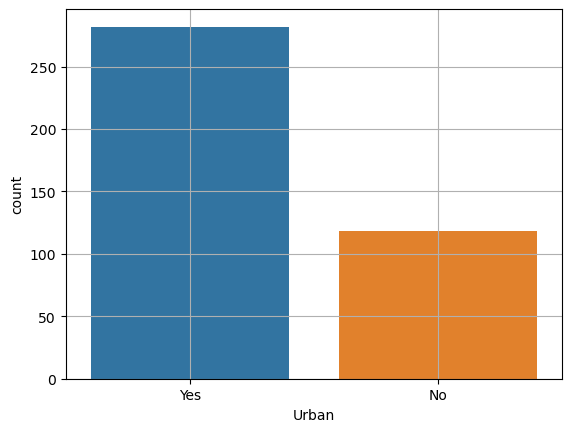

In [27]:
eda_1_c('Urban', data)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

1. 도심지역에 매장들이 있으며, 도심지역에서 카시트 구매량에 대해서 파악해 볼 필요가 있어 보인다.
2. 도심지역에서는 차량을 많이 사용해서 카시트가 많이 구매될 수 있을 가능성과
3. 도심지역이 아닌 곳에서 이동에 있어서 차량의 이동이 많을 수 있기 때문에 구매 비율이 높은 가능성에 대해 비교 해볼 필요가 있다.

5) 추가 분석해 볼 사항이 있나요?

## (2) ShelveLoc

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

ShelveLoc
Medium       0.5475
Bad          0.2400
Good         0.2125
dtype: float64

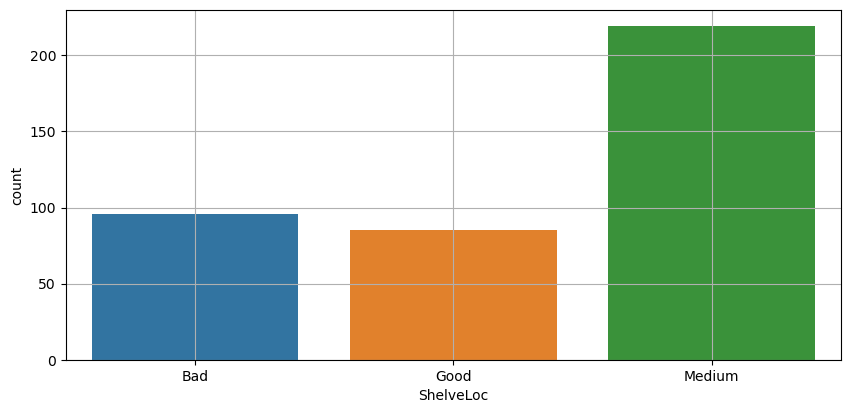

In [54]:
eda_1_o('ShelveLoc', data)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

1. 매장에 진열 되어있는 것이 잘 되어있으면 사람들의 눈에 더 잘띄고 소비가 많이 될 가능성이 높다.
2. 진열이 되어있는게 나쁜곳과 좋은 곳의 구매량의 비율을 확인해 볼 필요가 있다.

5) 추가 분석해 볼 사항이 있나요?

## (3) US

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

US 
Yes    0.645
No     0.355
dtype: float64

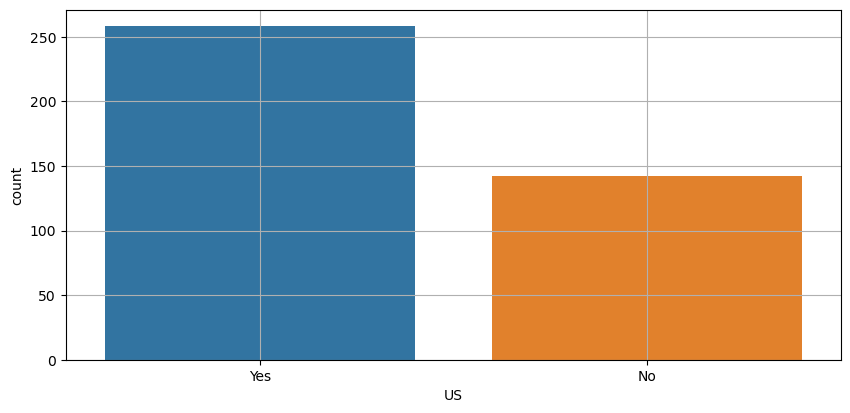

In [56]:
eda_1_o('US', data)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

1. 국내가 미국이라면 이 회사는 미국에 지점이 64% 있다고 파악이 된다.
2. 국내의 광고의 비용 / 국외의 광고 비용의 차이
3. 이에 따른 광고비용을 통한 판매 가격과 판매량의 상관관계를 비교해보는 것도 좋은 방안일 수 있다.

5) 추가 분석해 볼 사항이 있나요?